# V.1 Exploring the green reds

As a beginner in machine learning, you recall that one of the best things to do before breaking out the machine learning tools is to explore and look at your data.

> Technically the best thing to do first would be to **clean the data and
check for anomalies, errors, and outliers!**  But since, Marvin gave us
this data, we’ll trust him.  This time...

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

data = pd.read_csv("./resources/winequality-red.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
## check if there is missing data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

---

a) **Write a function** that will plot a scatterplot matrix of your red wine data. Your function should **plot wines with quality over some “good_threshold” as one color, and wines below some “bad_threshold” as another.** Your plotting function should have the option to save a .png of your plots. Here’s an example function definition:

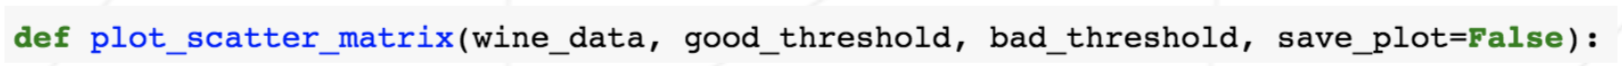

Here is a partial example (first 3 rows and columns) of what your function might output if you were to set a "good_threshold" score of 6 and a "bad_threshold" score of 5:

<img src="img/scatter_plot.png" alt="Drawing" width="300px" align="left"/>


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

The threshold ratio of **good** and **bad** winde

In [5]:
((data["quality"] > 6).sum() / data.count()[0]) * 100

13.570981863664791

---

In [6]:
import matplotlib.pyplot as plt

In [35]:
list(data.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [84]:
def plot_scatter_matrix(wind_data, good_threshold, bad_threshold, save_plot=False):
    nb_vars = len(wind_data.columns)
    variables = list(wind_data.columns)
    fig, axes = plt.subplots(nb_vars, nb_vars)
    
    for x, a in enumerate(variables):
        for y, b in enumerate(variables):
            if (x == y):
#                 labeling
                axes[x, y].text(0.5 ,0.5, a, ha='center', va='center', color='grey', size=15)
            else:
                good = data[data["quality"] >= good_threshold]
                bad = data[data["quality"] <= bad_threshold]
                axes[x, y].scatter(good[a], good[b], alpha = 0.15, color='green')
                axes[x, y].scatter(bad[a], bad[b], alpha = 0.15, color='red')
    fig.set_size_inches(30, 30)
    if save_plot == True:
        plt.savefig('plot.png')
    else:
        plt.show()

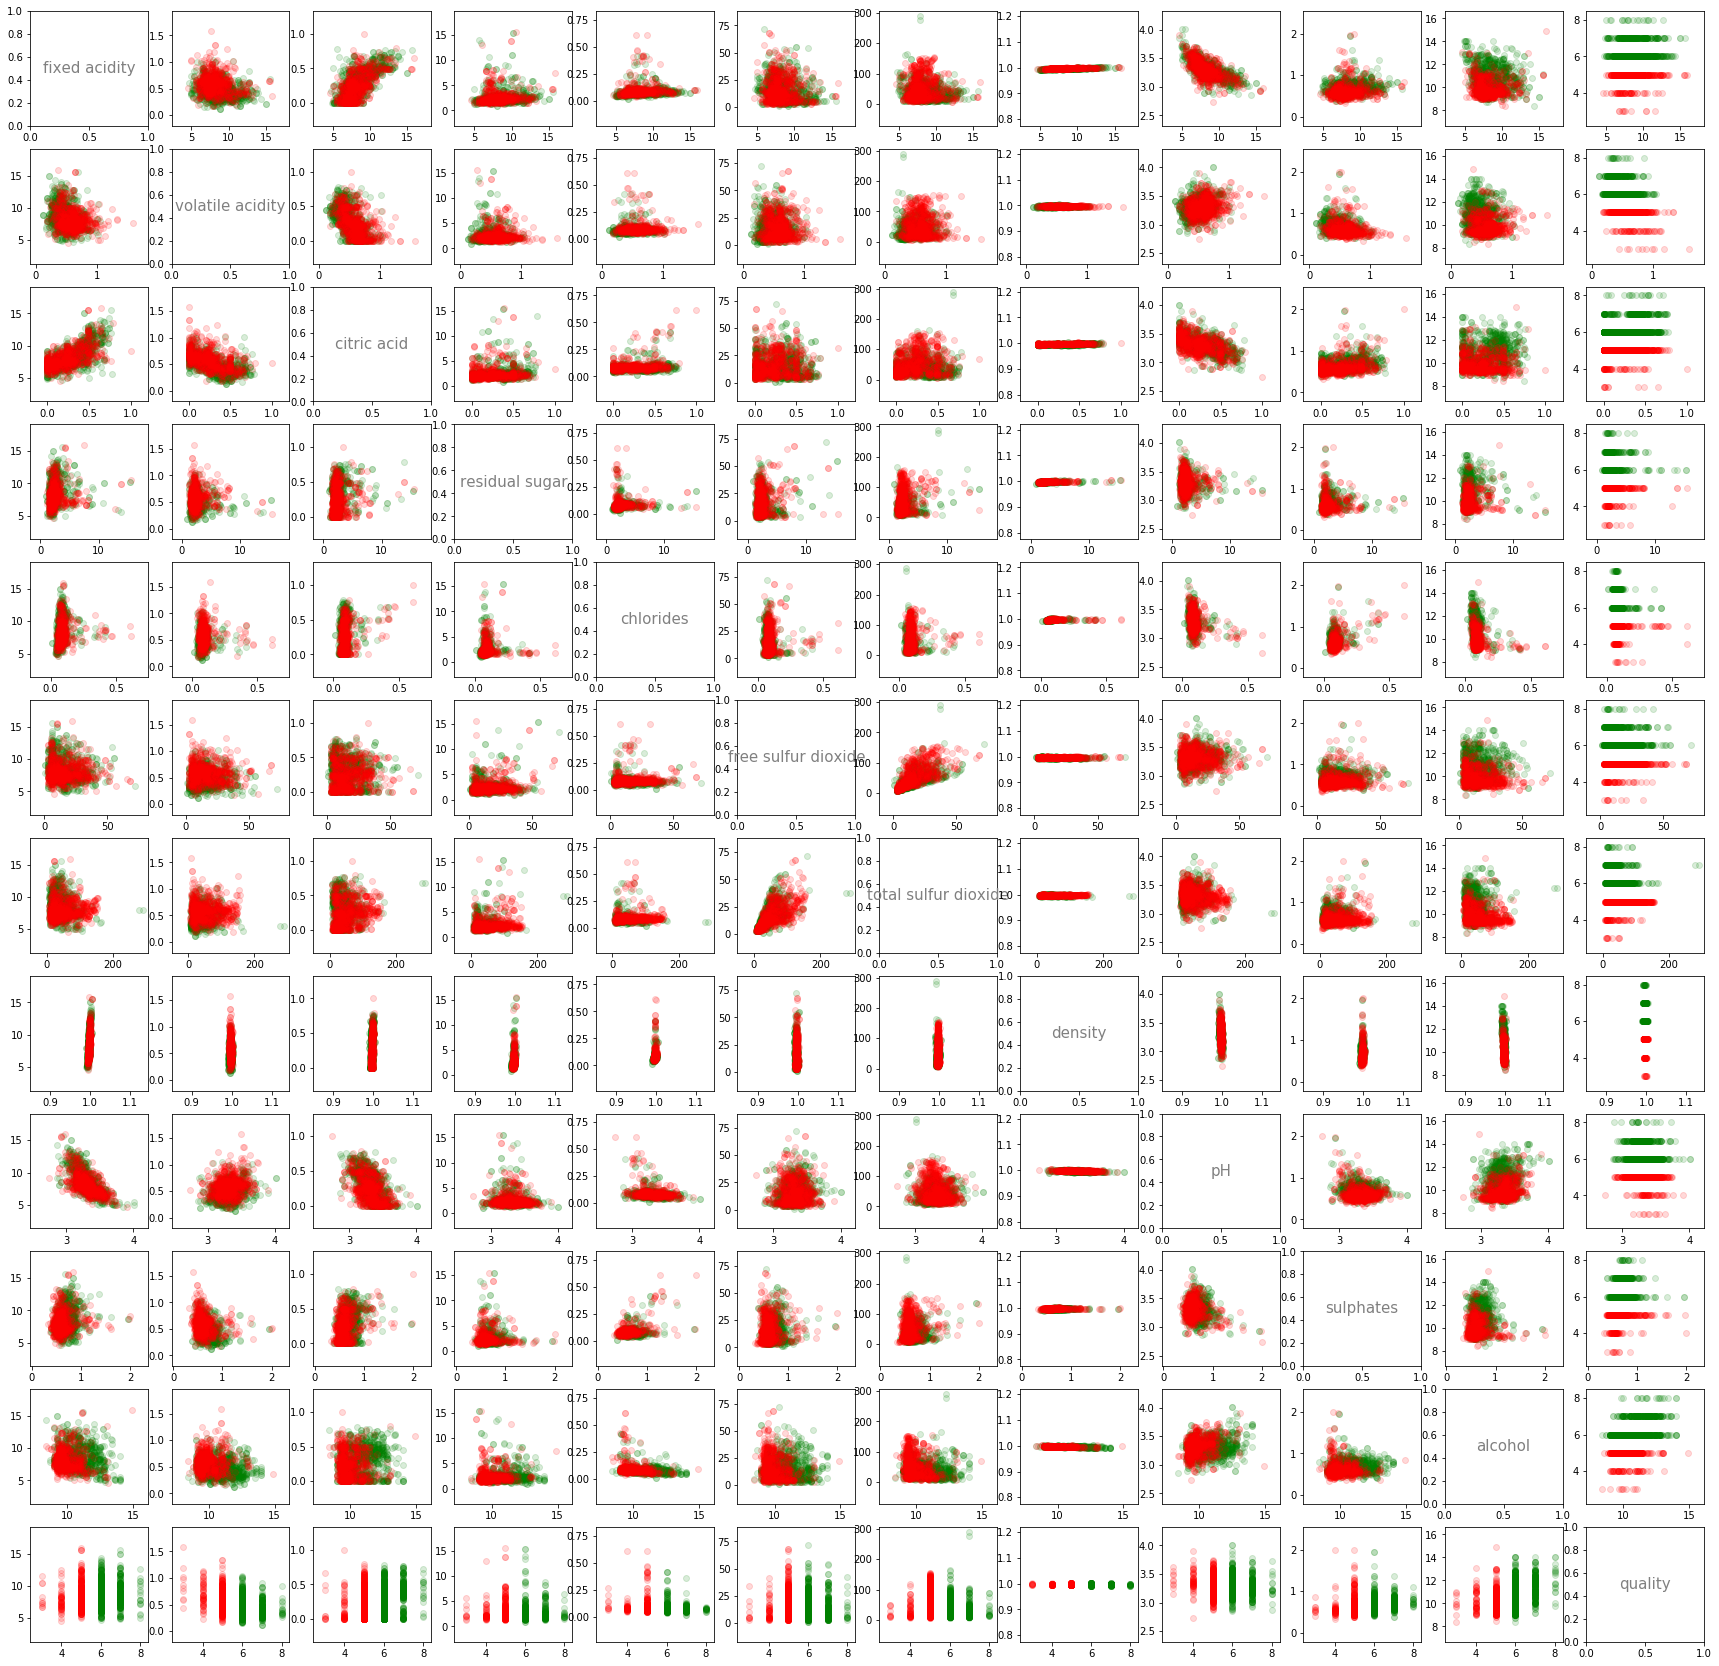

In [85]:
plot_scatter_matrix(data, 6, 5)

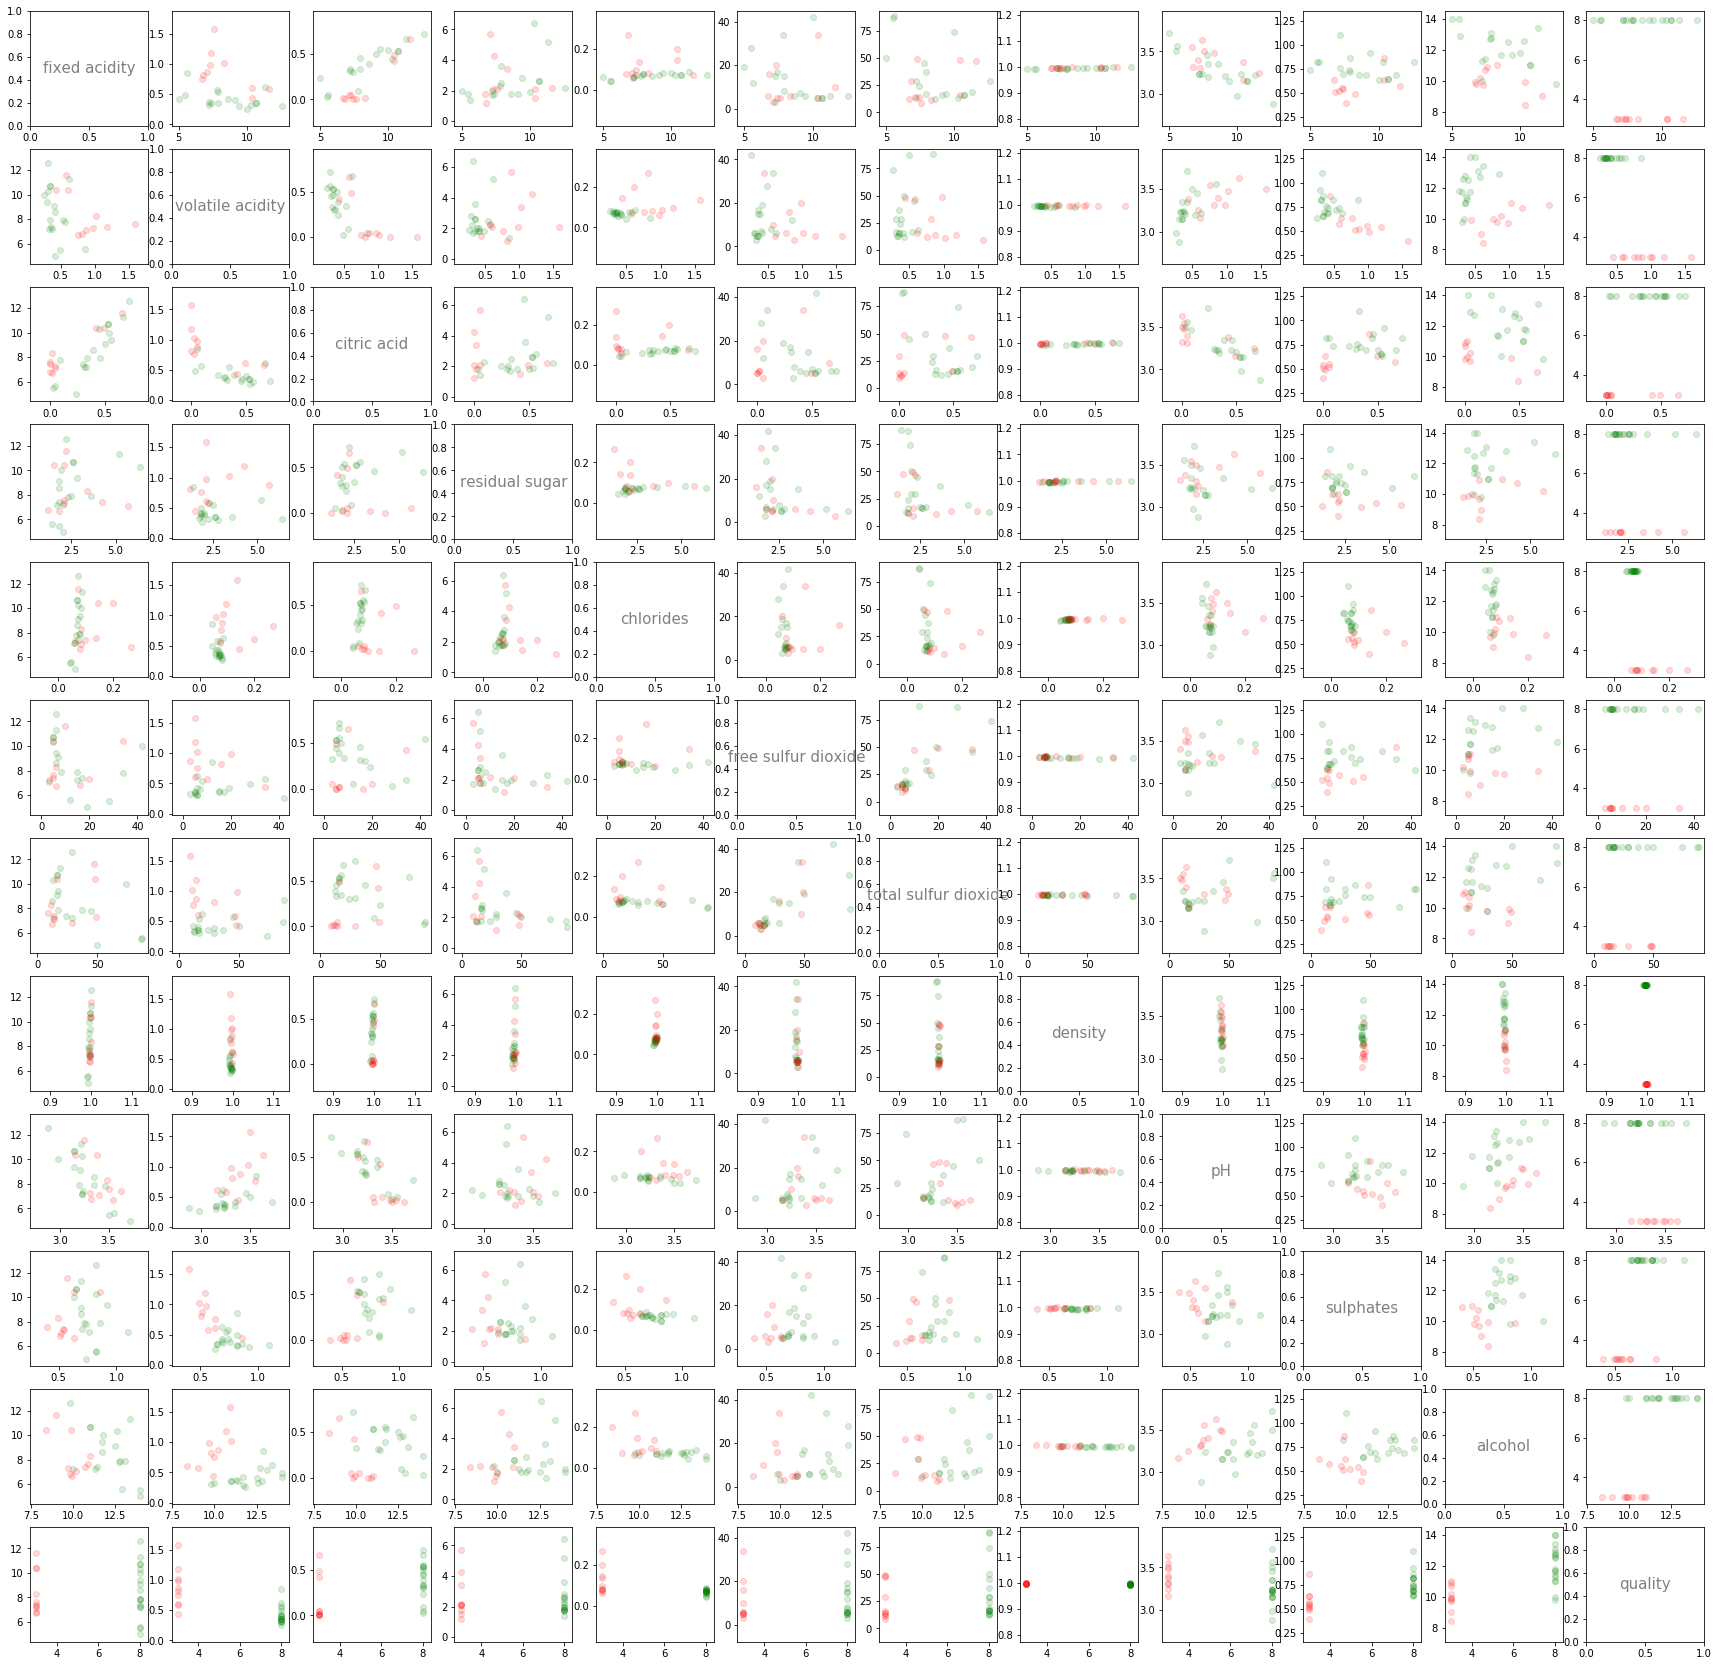

In [86]:
plot_scatter_matrix(data, 8, 3, True)

b) Now that you’ve had a chance to analyze different chemical factors in red wines and their relationship with high scores (8 or higher) and low scores (3 or lower), which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?

When we lookup the sactter table, **PH** and **alchol** graph has distinguishable with easy. we could draw a linear line discret good and bad wine.